# 01 - Exploratory Data Analysis (EDA)


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

PROJECT_ROOT = Path('..')
DATA_DIR = PROJECT_ROOT / 'data'
TRAIN_PATH = DATA_DIR / 'train.csv'
TEST_PATH = DATA_DIR / 'test.csv'

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
train.head()


,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,Target,forecast_length
0,ID_KwcTp_12,11,0.3,0.0,Tumfa,atiwa_west,2025-05-30 11:09:33,NaN,NaN,NaN,MEDIUMRAIN,12
1,ID_K9vWT_12,17,0.3,0.0,Kwabeng,atiwa_west,2025-05-30 11:09:35,NaN,NaN,NaN,HEAVYRAIN,12
2,ID_AIQg3_12,19,0.3,0.0,Akropong,atiwa_west,2025-05-30 11:09:47,NaN,NaN,NaN,MEDIUMRAIN,12
3,ID_px4yf_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:33,NaN,NaN,NaN,HEAVYRAIN,12
4,ID_QYYmK_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:55,NaN,NaN,NaN,HEAVYRAIN,12


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10928 non-null  object 
 1   user_id                10928 non-null  int64  
 2   confidence             10928 non-null  float64
 3   predicted_intensity    10928 non-null  float64
 4   community              10928 non-null  object 
 5   district               10928 non-null  object 
 6   prediction_time        10928 non-null  object 
 7   indicator              503 non-null    object 
 8   indicator_description  346 non-null    object 
 9   time_observed          72 non-null     object 
 10  Target                 10928 non-null  object 
 11  forecast_length        10928 non-null  int64  
 12  text_len               10928 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 1.1+ MB


In [3]:
train.isna().mean().sort_values(ascending=False).head(20)


time_observed            0.993411
indicator_description    0.968338
indicator                0.953971
ID                       0.000000
user_id                  0.000000
confidence               0.000000
predicted_intensity      0.000000
community                0.000000
district                 0.000000
prediction_time          0.000000
Target                   0.000000
forecast_length          0.000000
dtype: float64

## Target Distribution


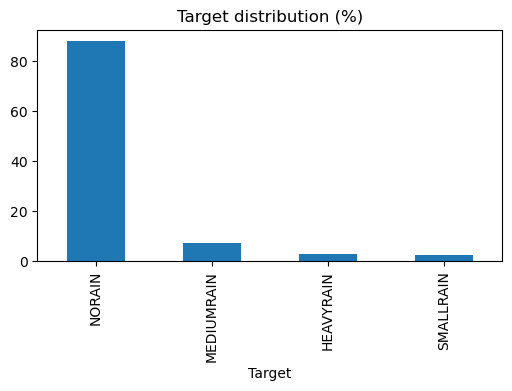

In [4]:
target_col = 'Target'
ax = train[target_col].value_counts(normalize=True).mul(100).plot(kind='bar', figsize=(6,3), title='Target distribution (%)')
plt.show()


## Key Feature Distributions


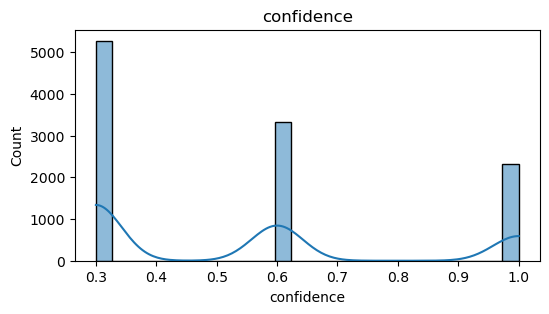

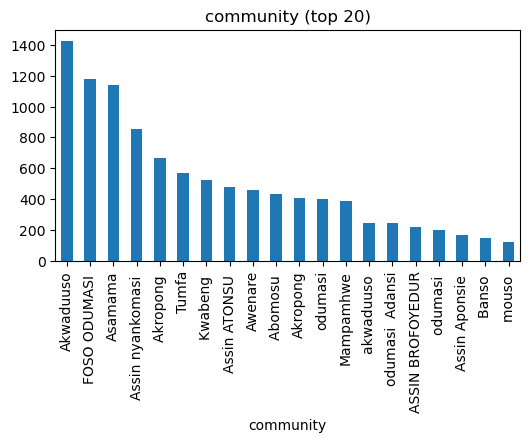

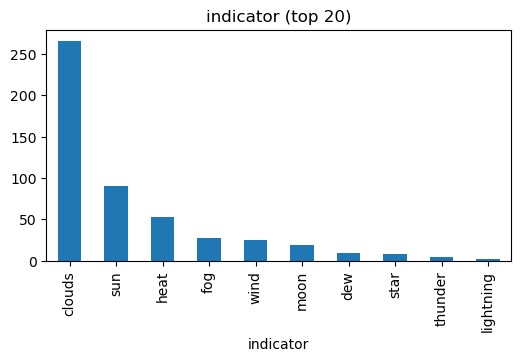

In [5]:
for col in ['confidence', 'community', 'indicator']:
    if col in train.columns:
        plt.figure(figsize=(6,3))
        if str(train[col].dtype) == 'object':
            train[col].value_counts().head(20).plot(kind='bar', title=f'{col} (top 20)')
        else:
            sns.histplot(train[col].dropna(), kde=True)
            plt.title(col)
        plt.show()


## Text Lengths and Common Words


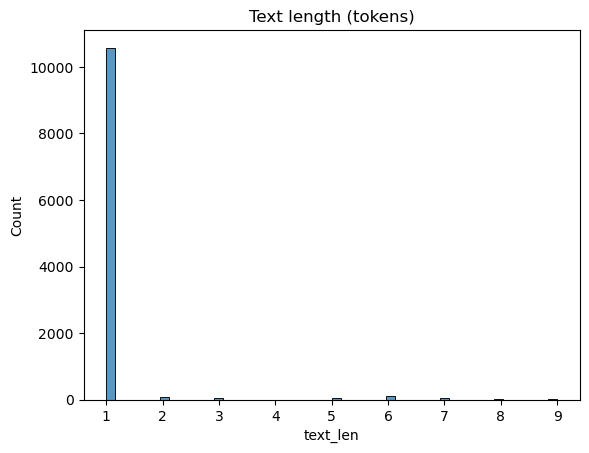

In [6]:
text_col = 'indicator_description'
if text_col in train.columns:
    train['text_len'] = train[text_col].astype(str).str.split().map(lambda x: len(x))
    sns.histplot(train['text_len'], bins=50)
    plt.title('Text length (tokens)')
    plt.show()
    
    from collections import Counter
    cnt = Counter()
    train[text_col].astype(str).str.lower().str.replace(r'[^a-z0-9 ]', ' ', regex=True).str.split().map(cnt.update)
    pd.Series(cnt).sort_values(ascending=False).head(30)
else:
    print('No text column found for EDA')
